<a href="https://colab.research.google.com/github/LINU0/Algorithm_Midterm_Exam/blob/main/%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E4%B8%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import time
import matplotlib.pyplot as plt

In [4]:
def prepare_list(n):
  S = random.sample(range(1, 2*n+1), n)
  x = random.randint(1,2*n)  #數字範圍設2n
  return S,x

In [5]:
# linear search
def linear_search(S, x):
  for i in range(len(S)):
    if S[i] == x:
      return i
  return -1

# binary search  
def binary_search(S, x):
  left = 0
  right = len(S) - 1
  while left <= right:
    mid = (left + right) // 2
    if S[mid] == x:
      return mid
    elif S[mid] < x:
      left = mid + 1
    else:
      right = mid - 1
  return -1

# Fibonacci search
def fibonacci_search(S, x):
  size = len(S)     
  start = -1     
  f0 = 0
  f1 = 1
  f2 = 1

  while(f2 < size):
    f0 = f1
    f1 = f2
    f2 = f1 + f0
       
  while(f2 > 1):
    i = min(start + f0, size - 1)
    if S[i] < x:
      f2 = f1
      f1 = f0
      f0 = f2 - f1
      start = i
    elif S[i] > x:
      f2 = f0
      f1 = f1 - f0
      f0 = f2 - f1
    else:
      return i
  if (f1) and (S[size - 1] == x):
    return size - 1
  else:
    return -1



In [13]:
def execution_time(r1,r2):  #r1為n的起始值,r2為n的終值
  linear_mean_time_list = []
  binary_mean_time_list = []
  fibonacci_mean_time_list = []
  for n in range(r1,r2+1,10):
    linear_execution_time_list = []
    binary_execution_time_list = []
    fibonacci_execution_time_list = []

    for i in range(5):#performing the task 5 times
      S, x = prepare_list(n)

      l_start_time = time.process_time()
      linear_search(S, x)
      l_end_time = time.process_time()
      l_execution_time = l_end_time - l_start_time
      linear_execution_time_list.append(l_execution_time)

      S.sort()

      b_start_time = time.process_time()
      binary_search(S, x)
      b_end_time = time.process_time()
      b_execution_time = b_end_time - b_start_time
      binary_execution_time_list.append(b_execution_time)

      f_start_time = time.process_time()
      fibonacci_search(S, x)
      f_end_time = time.process_time()
      f_execution_time = f_end_time - f_start_time
      fibonacci_execution_time_list.append(f_execution_time)
    #mean execution time
    linear_mean_time = sum(linear_execution_time_list) / len(linear_execution_time_list)
    linear_mean_time_list.append(linear_mean_time)
    binary_mean_time = sum(binary_execution_time_list) / len(binary_execution_time_list)
    binary_mean_time_list.append(binary_mean_time)
    fibonacci_mean_time = sum(fibonacci_execution_time_list) / len(fibonacci_execution_time_list)
    fibonacci_mean_time_list.append(fibonacci_mean_time)
  return linear_mean_time_list,binary_mean_time_list,fibonacci_mean_time_list


In [14]:
#8.a.
linear_mean_time_list,binary_mean_time_list,fibonacci_mean_time_list=execution_time(10,1000) 

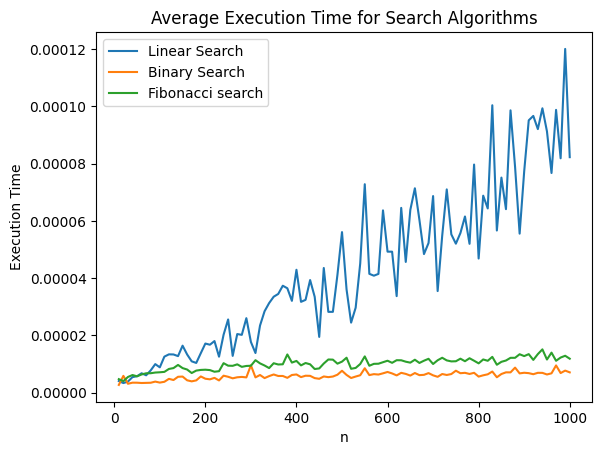

In [15]:
n_values = list(range(10, 1001, 10))
plt.plot(n_values, linear_mean_time_list, label="Linear Search")
plt.plot(n_values, binary_mean_time_list, label="Binary Search")
plt.plot(n_values, fibonacci_mean_time_list, label="Fibonacci search")
plt.xlabel("n")
plt.ylabel("Execution Time")
plt.title("Average Execution Time for Search Algorithms")
plt.legend()
plt.show()

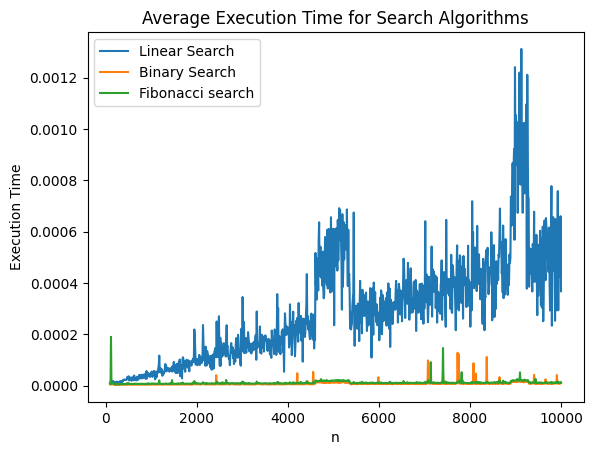

In [12]:
#8.c.
linear_mean_time_list,binary_mean_time_list,fibonacci_mean_time_list=execution_time(100,10000)
n_values = list(range(100, 10001, 10))
plt.plot(n_values, linear_mean_time_list, label="Linear Search")
plt.plot(n_values, binary_mean_time_list, label="Binary Search")
plt.plot(n_values, fibonacci_mean_time_list, label="Fibonacci search")
plt.xlabel("n")
plt.ylabel("Execution Time")
plt.title("Average Execution Time for Search Algorithms")
plt.legend()
plt.show()